In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
pd.read_csv('table.csv')

,Paper,Host-DNA depletion,Microbial enrichment,Sequencing technology,Sequencing depth (Gbp),Tissue,Disease,Data public,Sample size (n),Bioinformatics tools,Fresh or frozen samples
0,2017,Yes,No,Illumina HiSeq 2500,X,Bone and joint,Bone and joint infections,No,47,"MetaPhlAn2, Kraken, Bowtie2",Frozen
1,2019,Yes,No,Illumina MiSeq,0.5,Aortic valve,Infective endocarditis,Yes,1,"CLARK, MetaPhlAn2, mothur, UBLAST",Frozen
2,2019,No,Yes,Illumina MiSeq,0.041,Aortic valve,Infective endocarditis,Yes,1,"CLARK, USEARCH, MetaPhlAn2, BWA, BLAST",Frozen
3,2019,No,No,Illumina MiSeq,?,Cerebrospinal fluid,Toscana virus,Yes,1,"TOSV, SmaltAlign, VirMet",Fresh
4,2019,No,No,Illumina GAIIx,0.07,Sputum,Polymicrobial infections,Yes,3,"SMALT, BLASTn",Frozen
5,2019,No,No,Illumina NextSeq,9.75,Feces and rectal swabs,Klebsiella pneumoniae,Yes,2,"Canu, Pilon, Snippy, SPAdes, Prokka, IDBA-UD, ...",Fresh
6,2018,Yes,No,Illumina MiSeq,0.0002,Liver,Chronic hepatic brucelloma,Yes,1,"Mothur, Kraken, BWA",Frozen
7,2017,No,Yes,"Illumina HiSeq 2000, Illumina HiSeq 2500",1,Broncho-alveolar lavage,Chronic pneumonia,Yes,1,"CLARK, Kraken, MetaPhlAn2, USEARCH, UBLAST",Frozen
8,2019,No,No,Illumina HiSeq,X,Cerebrospinal fluid,Meningitis and encephalitis,No,204,"MAFFT, PhyML, SURPI+",Frozen
9,2018,Yes,No,MinION nanopore,?,"Sputum, BAL and ETAs",Lower respiratory infections,Yes,40,"Porechop, Minimap2, Canu, BLAST, WIMP, ARMA",Frozen


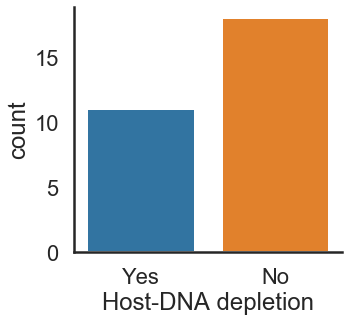

In [3]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='Host-DNA depletion',kind="count",data=pd.read_csv('table.csv'))
g=sns.despine()

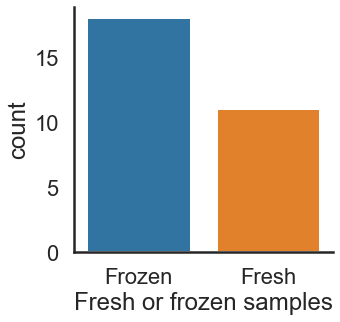

In [4]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='Fresh or frozen samples',kind="count",data=pd.read_csv('table.csv'))
g=sns.despine()

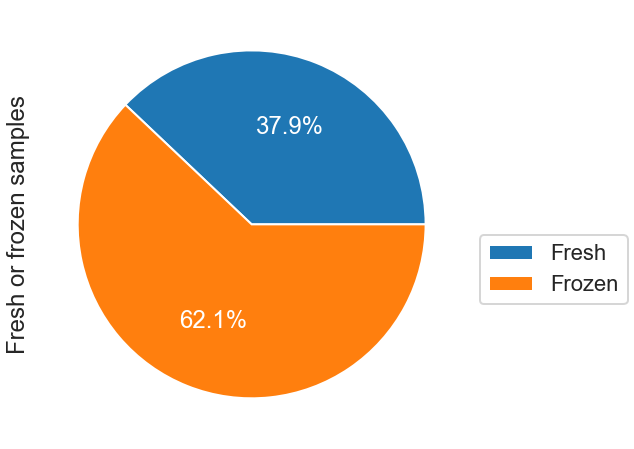

In [5]:
table = pd.DataFrame({'Fresh or frozen samples': [11,18]}, index=['Fresh','Frozen'])

plot = table.plot.pie(y = 'Fresh or frozen samples', figsize=(8,8),autopct='%1.1f%%', textprops = {'color':"w"})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

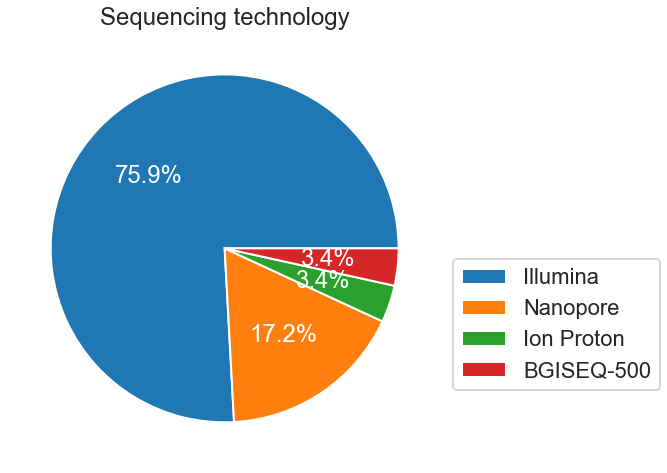

In [6]:
seq = pd.DataFrame({'Sequencing technology': [22, 5, 1,1]}, index=['Illumina', 'Nanopore', 'Ion Proton','BGISEQ-500'])
plot = seq.plot.pie(y = 'Sequencing technology', figsize=(8,8),legend=None, autopct='%1.1f%%', textprops = {'color':"w"})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.ylabel("")
plt.title("Sequencing technology")
plt.savefig("seq_tech.png",bbox_inches='tight')

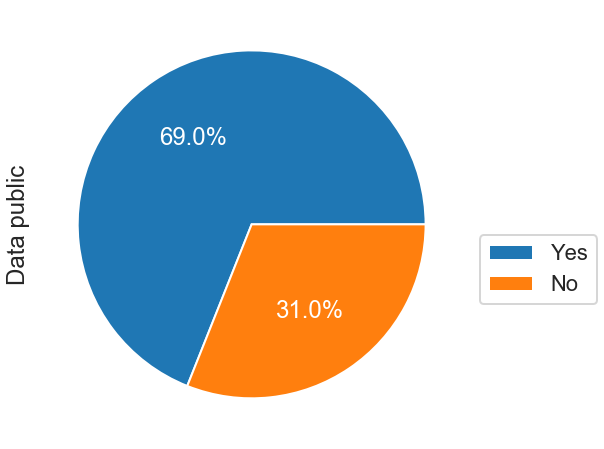

In [7]:
table = pd.DataFrame({'Data public': [20,9]}, index=['Yes','No'])

plot = table.plot.pie(y = 'Data public', figsize=(8,8),autopct='%1.1f%%', textprops = {'color':"w"})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("data_public.png",bbox_inches='tight')

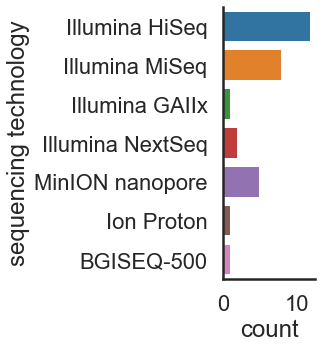

In [8]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(y='sequencing technology',kind="count",data=pd.read_csv('seqtech.csv'))

In [9]:
biot = pd.read_csv('biotools.csv')
biot['bioinformatics tools'].value_counts()

BLAST                      9
MetaPhlAn2                 7
Bowtie2                    6
Kraken                     6
BWA                        6
Canu                       4
Minimap2                   4
CLARK                      3
IDBA-UD                    2
Geneious                   2
SPAdes                     2
Porechop                   2
USEARCH                    2
BioBloom                   2
BBMap                      2
GSNAPL                     2
LMAT                       2
RepeatMasker               2
Pilon                      2
cd-hit-dup                 2
Prokka                     2
WIMP                       2
mlst                       2
ABRicate                   2
mothur                     2
ESOM                       2
Snippy                     2
UBLAST                     2
SMALT                      1
dustmasker                 1
PhyML                      1
SmaltAlign                 1
Fast5-to-Fastq             1
SAMtools                   1
SURPI+        

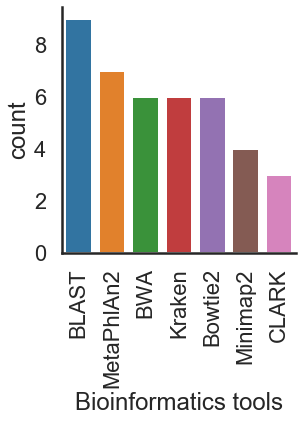

In [10]:
#table = pd.DataFrame({'bioinformatics tools': [9,7,6,6,6,4,3]}, index=['BLAST','MetaPhlAn2','BWA','Kraken','Bowtie2','Minimap2','CLARK'])
#plot = table.plot.pie(subplots=True, figsize=(8,8),legend=None)
#plt.ylabel("")


g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(y='count', x='Bioinformatics tools',kind='bar',data=pd.read_csv('biotools_count.csv'),legend=False)
plt.xticks(rotation=90)
plt.savefig('bioinformatics_tools_bar.png',bbox_inches='tight')

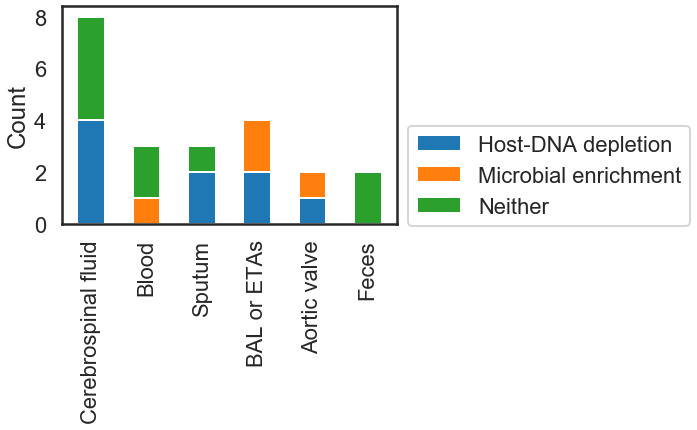

In [11]:
N = 6
host = [4,0,2,2,1,0]
enrich = [0,1,0,2,1,0]
nope = [4,2,1,0,0,2]
position = [0,2,4,6,8,10]
BarWidth = 1

two_bottom = np.add(host, enrich)

#Host depletion
p1 = plt.bar(position, host, width=BarWidth)
#enrichment
p2 = plt.bar(position, enrich, width=BarWidth, bottom=host)
#Neither
p3 = plt.bar(position, nope, width=BarWidth, bottom=two_bottom)

plt.ylabel('Count')
plt.xticks(position, ('Cerebrospinal fluid', 'Blood', 'Sputum', 'BAL or ETAs', 'Aortic valve','Feces'))
plt.yticks(np.arange(0, 10, 2))
plt.legend((p1[0], p2[0], p3[0]), ('Host-DNA depletion', 'Microbial enrichment', 'Neither'), loc='best', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)

plt.savefig('isolation_methods.png', bbox_inches='tight')

In [12]:
ct = pd.read_csv('table.csv')
ct['Host-DNA depletion'].value_counts()

No     18
Yes    11
Name: Host-DNA depletion, dtype: int64

In [13]:
ct = pd.read_csv('table.csv')
ct['Microbial enrichment'].value_counts()

No     22
Yes     7
Name: Microbial enrichment, dtype: int64

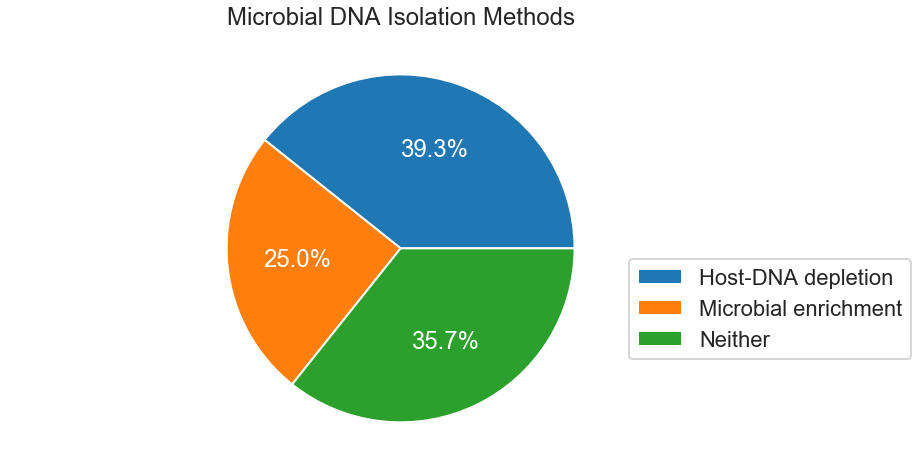

In [14]:
seq = pd.DataFrame({'ratio': [11, 7, 10]}, index=['Host-DNA depletion','Microbial enrichment', 'Neither'])
plot = seq.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.ylabel("", color = "black")
plt.title("Microbial DNA Isolation Methods")
plt.savefig('isolation_methods_all.png',bbox_inches='tight')

In [15]:
dis = pd.read_csv('disease.csv')
dis['disease'].value_counts()

Meningoencephalitis                  5
Pneumonia                            5
Prosthetic joint infections          3
Lower respiratory infections         2
Central nervous system infections    2
Infective endocarditis               2
Prosthetic Joint Infections          1
Bone and joint infections            1
Polymicrobial infections             1
Pneumonia                            1
Name: disease, dtype: int64

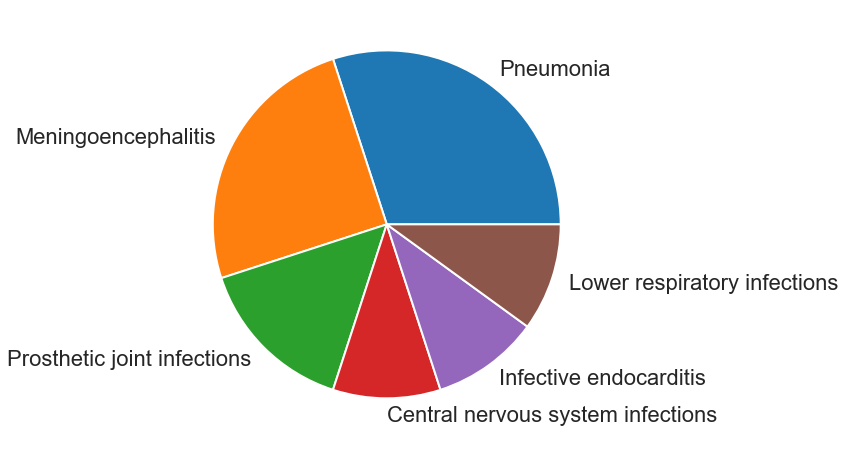

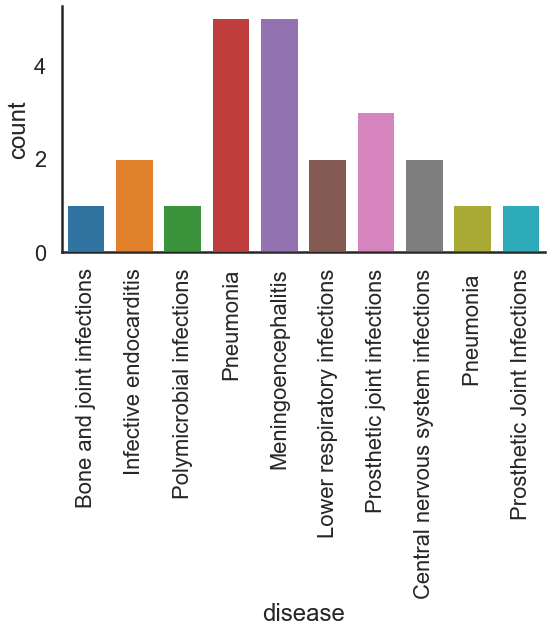

In [16]:
table = pd.DataFrame({'disease': [6,5,3,2,2,2]}, index=['Pneumonia','Meningoencephalitis','Prosthetic joint infections','Central nervous system infections','Infective endocarditis','Lower respiratory infections'])
plot = table.plot.pie(subplots=True, figsize=(8,8),legend=None)
plt.ylabel("")



g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='disease',kind="count",data=pd.read_csv('disease.csv'),aspect=2)
plt.xticks(rotation=90)
plt.savefig('disease_bar.png',bbox_inches='tight')

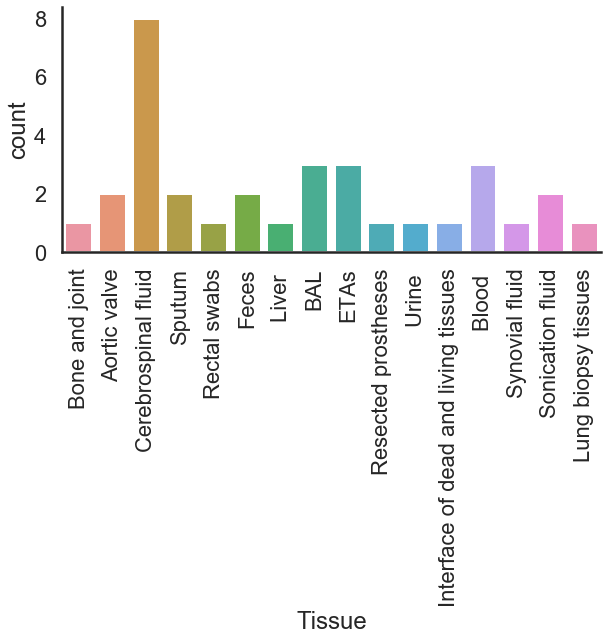

In [17]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='Tissue',kind="count",data=pd.read_csv('tissue_count.csv'),aspect=2)
plt.xticks(rotation=90)
plt.savefig('tissue_count.png',bbox_inches='tight')